#Trabalho Final de IA

In [ ]:
"""
Guilherme Araújo Mendes de Souza - 156437
UNIFESP - ICT
IA

Trabalho Final de Inteligência Artificial
"""

#Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats

#Funções

In [2]:
def converte_id(id):

    num = str(id)[0:2]
    num = int(num)
    return estado[estado["estados_id"] == num]

In [3]:
def adicao(df):
    munic = []
    esta = []
    for i in range(len(df["id_municipio"])):
        ind = municipio[municipio["Código Município Completo"] == df["id_municipio"][i]]["Nome_Microrregião"].index[0]
        nome_mun = municipio[municipio["Código Município Completo"] == df["id_municipio"][i]]["Nome_Microrregião"][ind]

        ind_es = municipio[municipio["Código Município Completo"] == df["id_municipio"][i]]["Código Município Completo"][ind]
        m = converte_id(ind_es)["Estados"].index[0]
        nome_est = converte_id(ind_es)["Estados"][m]

        munic.append(nome_mun)
        esta.append(nome_est)
    return munic, esta

In [4]:
def estado_ano(df,nome,Mean):
    sum = df[["ano",nome]].groupby(['ano']).sum()
    media = sum[nome].mean()
    vals = []
    if Mean == False:
        for k in sum[nome]:
            vals.append(k)
    else:
        for k in sum[nome]:
            vals.append(k/media)
    return np.array(vals),sum.index

In [5]:
def accuracy_score_with_tolerance(y_true, y_pred, tolerance=1):
  y_true = list(y_true)
  y_pred = list(y_pred)
  if len(y_true) != len(y_pred):
    raise ValueError("Os arrays devem ter o mesmo tamanho")
  count = 0
  for i in range(len(y_true)):
    if abs(y_true[i] - y_pred[i]) <= tolerance:
      count += 1
  return count / len(y_true)

#Leitura dos dados

In [6]:
dados = pd.read_csv("/content/Dados/data.csv")
municipio = pd.read_csv("/content/Dados/Counties.csv",sep = ';')
estado = pd.read_csv("/content/Dados/states.csv")

In [7]:
lista_mun , lista_est = adicao(dados)
dados["municipios"] = lista_mun
dados["estados"] = lista_est

In [10]:
dados.head()

,ano,id_municipio,area,desmatado,incremento,floresta,nuvem,nao_observado,nao_floresta,hidrografia,municipios,estados
0,2000,1100015,7137,1761.1,NaN,3639.6,0.0,6.1,1708.0,22.2,Cacoal,Rondônia
1,2000,1100023,4481,2661.2,NaN,1730.0,0.0,0.0,89.6,0.2,Ariquemes,Rondônia
2,2000,1100031,1322,851.2,NaN,455.2,0.0,0.6,11.3,3.7,Colorado do Oeste,Rondônia
3,2000,1100049,3821,2311.3,NaN,1477.7,0.0,0.0,26.2,5.8,Cacoal,Rondônia
4,2000,1100056,2805,731.3,NaN,829.3,0.0,0.0,1244.4,0.0,Colorado do Oeste,Rondônia


In [11]:
dados.shape

(16720, 12)

In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16720 entries, 0 to 16719
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ano            16720 non-null  int64  
 1   id_municipio   16720 non-null  int64  
 2   area           16720 non-null  int64  
 3   desmatado      16720 non-null  float64
 4   incremento     15960 non-null  float64
 5   floresta       16720 non-null  float64
 6   nuvem          16720 non-null  float64
 7   nao_observado  16720 non-null  float64
 8   nao_floresta   16720 non-null  float64
 9   hidrografia    16720 non-null  float64
 10  municipios     16720 non-null  object 
 11  estados        16720 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 1.5+ MB


In [13]:
dados.isnull().sum()

ano                0
id_municipio       0
area               0
desmatado          0
incremento       760
floresta           0
nuvem              0
nao_observado      0
nao_floresta       0
hidrografia        0
municipios         0
estados            0
dtype: int64

In [14]:
dados['incremento'].fillna(0, inplace=True)

In [15]:
dados.isnull().sum()

ano              0
id_municipio     0
area             0
desmatado        0
incremento       0
floresta         0
nuvem            0
nao_observado    0
nao_floresta     0
hidrografia      0
municipios       0
estados          0
dtype: int64

#Atribuição das classes

In [16]:
dados['class'] = dados['area'] / dados['incremento']

def atribuir_classes(valor):
    if valor < 10: #100% - 10%
        return 1
    elif 10 <= valor and valor < 20: #10% - 5%
        return 2
    elif 20 <= valor and valor < 33.33: #5% - 3%
        return 3
    elif 33.33 <= valor and valor < 100: #3% - 1%
        return 4
    elif 100 <= valor and valor < 140: #1 - 0.7%
        return 5
    elif 140 <= valor and valor < 200: #0.7 - 0.5%
        return 6
    elif 200 <= valor and valor < 333.33: #0.5% - 0.3%
        return 7
    elif 333.33 <= valor and valor < 500: #0.3% - 0.2%%
        return 8
    elif 500 <= valor and valor < 1000: #0,2% - 0,1%
        return 9
    elif 1000 <= valor and valor < 10000: #50% - 25%
        return 10
    else:
        return 11

dados['class'] = dados['class'].apply(atribuir_classes)

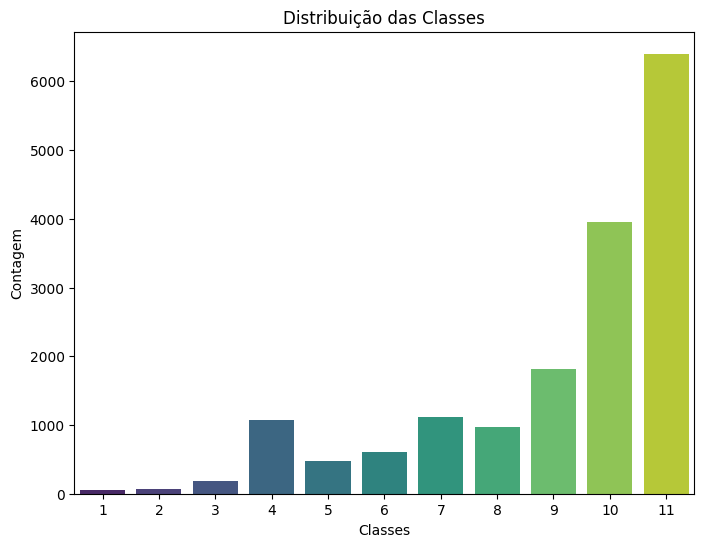

In [17]:
plt.figure(figsize=(8, 6))

sns.countplot(x='class', data=dados, palette='viridis')

plt.title('Distribuição das Classes')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()

# Analise dos dados

In [18]:
colunas = ['area', 'desmatado', 'incremento', 'floresta', 'nuvem', 'nao_observado', 'nao_floresta', 'hidrografia']
dados_filtrados = dados[colunas]
dados_filtrados.describe()

,area,desmatado,incremento,floresta,nuvem,nao_observado,nao_floresta,hidrografia
count,16720.000000,16720.000000,16720.000000,16720.000000,16720.000000,16720.000000,16720.000000,16720.000000
mean,6668.484211,954.653834,17.536118,3980.076304,303.187249,95.782614,1264.546304,148.586998
std,13857.511878,1374.296395,66.186963,11954.043960,1888.025470,562.813003,2401.909519,430.376364
min,64.000000,0.000000,0.000000,0.000000,0.000000,-379.600000,0.000000,0.000000
25%,891.750000,120.300000,0.000000,19.000000,0.000000,0.000000,4.600000,0.000000
50%,2379.500000,450.400000,1.000000,222.650000,0.000000,0.000000,195.850000,4.350000
75%,6422.000000,1258.325000,8.600000,2295.425000,5.100000,1.200000,1436.725000,65.025000
max,159540.000000,20471.500000,1808.600000,152013.600000,68394.900000,11321.100000,19780.800000,4499.900000


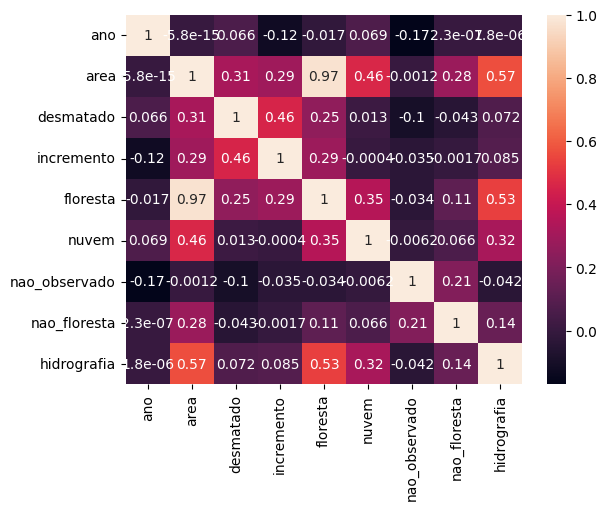

In [21]:
colunas = ['ano', 'area', 'desmatado', 'incremento', 'floresta', 'nuvem', 'nao_observado', 'nao_floresta', 'hidrografia', 'class']
dados_filtrados = dados[colunas]

sns.heatmap(dados_filtrados.corr(method='pearson').drop(
  ['class'], axis=1).drop(['class'], axis=0),
            annot = True);

plt.show()

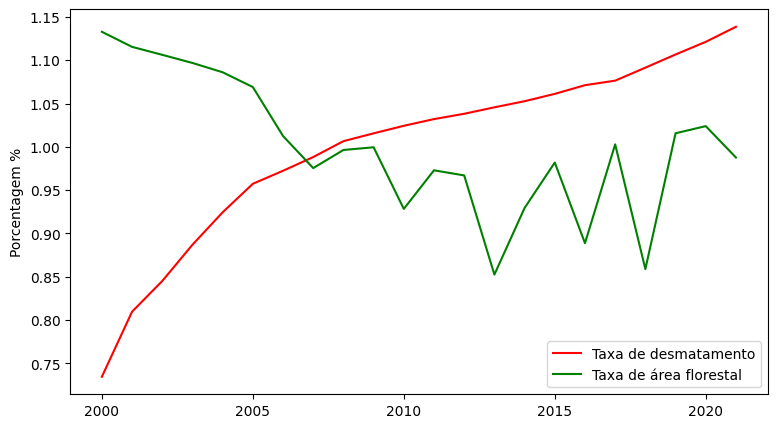

In [22]:
lista1, anos1 = estado_ano(dados,"desmatado",True)
lista2, anos2 = estado_ano(dados,"floresta",True)
plt.figure(figsize=(9, 5))
plt.plot(list(anos1),lista1,"r", label="Taxa de desmatamento")
plt.plot(list(anos2),lista2,"g", label="Taxa de área florestal")
plt.ylabel("Porcentagem %")
plt.legend()

In [23]:
anos = list(set(dados["ano"]))
year = []
desmat = []
munic = []
esta = []
for ano in anos:

  new = dados[dados["ano"]==ano]
  new  = new.sort_values(by=['desmatado'], ascending=False)

  year.append(np.array(list(new.copy().iloc[0:10]["ano"])[:]))
  desmat.append(np.array(list(new.copy().iloc[0:10]["desmatado"])[:]))
  munic.append(np.array(list(new.copy().iloc[0:10]["municipios"])[:]))
  esta.append(np.array(list(new.copy().iloc[0:10]["estados"])[:]))

In [24]:
dic = dict()
dic["ano"] = np.array(year).reshape(1,-1)[0]
dic["estado"] = np.array(esta).reshape(1,-1)[0]
dic["desmatado"] = np.array(desmat).reshape(1,-1)[0]
dic["municipio"] = np.array(munic).reshape(1,-1)[0]
novo = pd.DataFrame(dic)
novo

,ano,estado,desmatado,municipio
0,2000,Pará,7212.3,Paragominas
1,2000,Pará,7037.4,São Félix do Xingu
2,2000,Pará,5818.9,Marabá
3,2000,Mato Grosso,5520.7,Arinos
4,2000,Maranhâo,5373.3,Pindaré
...,...,...,...,...
215,2021,Pará,8616.0,Tucuruí
216,2021,Mato Grosso,8272.2,Arinos
217,2021,Pará,7528.9,São Félix do Xingu
218,2021,Pará,7353.5,Conceição do Araguaia


In [25]:
muns = list(Counter(novo["municipio"]))
mat = []
for i in range(len(muns)):

  data = dados[dados["municipios"] == muns[i]]
  mat.append(estado_ano(data,"desmatado",False)[0])

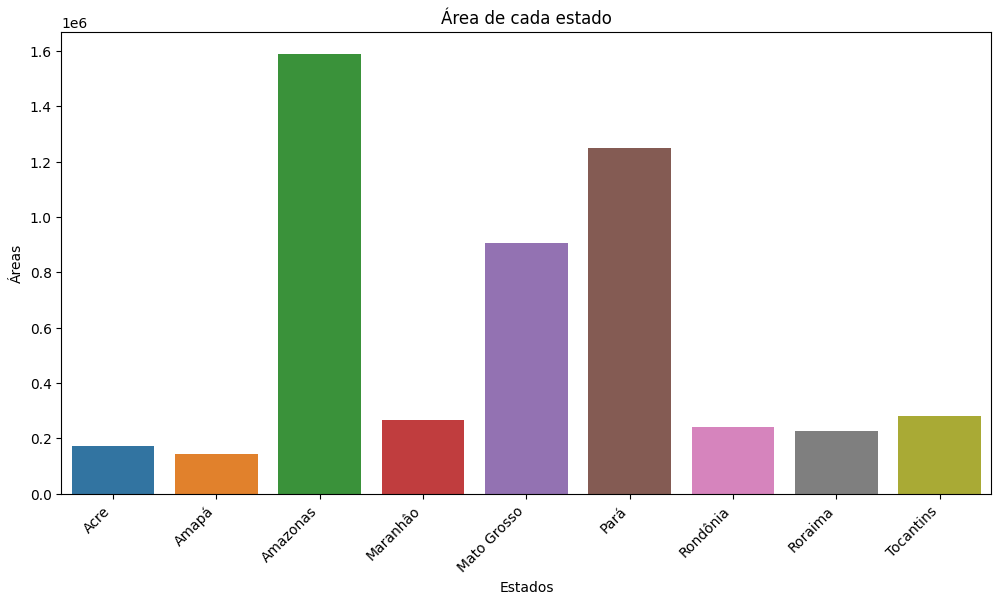

In [26]:
#Área de cada estado
soma_areas_por_estado = dados.groupby(['estados', 'ano'])['area'].sum()
media_soma_areas_por_estado = soma_areas_por_estado.groupby('estados').mean()
media_soma_areas_por_estado = media_soma_areas_por_estado.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='estados', y='area', data=media_soma_areas_por_estado)

plt.title('Área de cada estado')
plt.xlabel('Estados')
plt.ylabel('Áreas')
plt.xticks(rotation=45, ha='right')

plt.show()

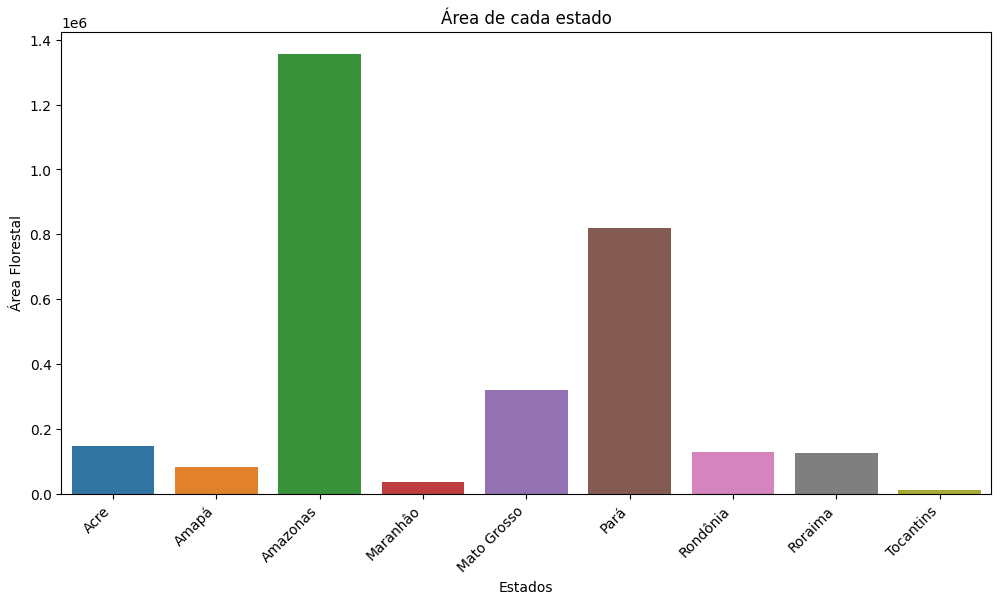

In [27]:
#Area Florestal de cada estado
soma_areas_por_estado = dados.groupby(['estados', 'ano'])['floresta'].sum()
media_soma_areas_por_estado = soma_areas_por_estado.groupby('estados').mean()
media_soma_areas_por_estado = media_soma_areas_por_estado.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='estados', y='floresta', data=media_soma_areas_por_estado)

plt.title('Área de cada estado')
plt.xlabel('Estados')
plt.ylabel('Área Florestal')
plt.xticks(rotation=45, ha='right')

plt.show()

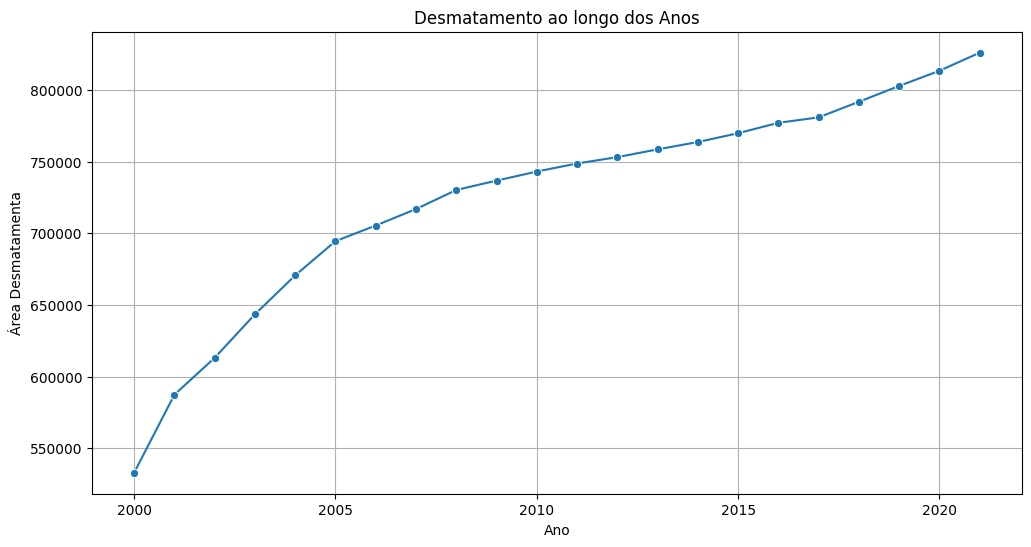

In [29]:
#Desmatamento geral ao longo dos anos
soma_desmatamento_geral_por_ano = dados.groupby('ano')['desmatado'].sum().reset_index()
soma_desmatamento_geral_por_ano = soma_desmatamento_geral_por_ano.reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x='ano', y='desmatado', data=soma_desmatamento_geral_por_ano, marker='o')

plt.title('Desmatamento ao longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Área Desmatamenta')
plt.grid(True)

plt.show()

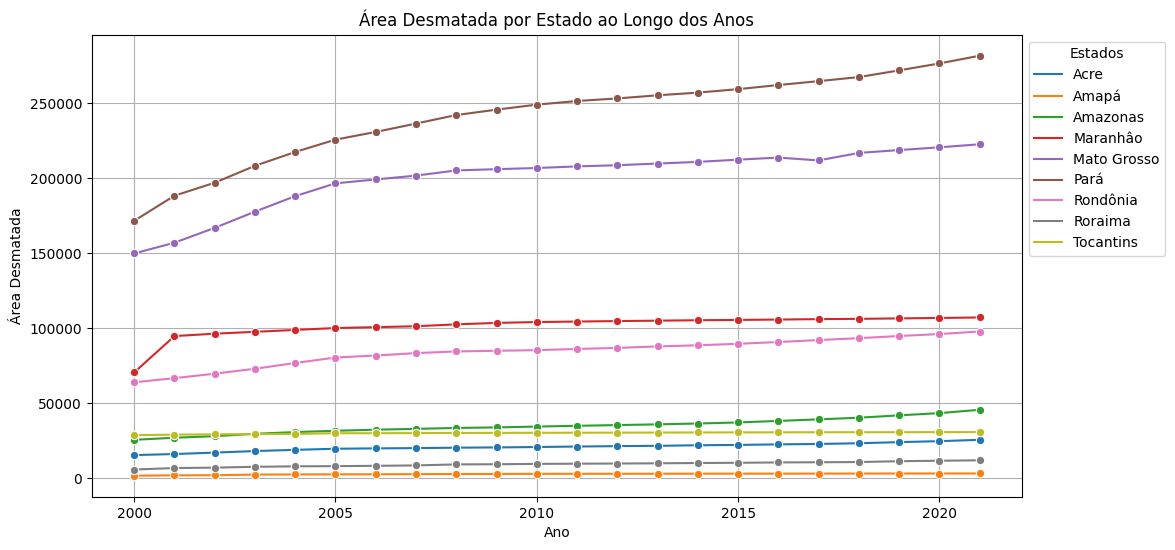

In [30]:
#Desmatamento total de cada estado
soma_desmatamento_por_estado = dados.groupby(['estados', 'ano'])['desmatado'].sum()
soma_desmatamento_por_estado = soma_desmatamento_por_estado.reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x='ano', y='desmatado', hue='estados', data=soma_desmatamento_por_estado, marker='o')

plt.title('Área Desmatada por Estado ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Área Desmatada')
plt.legend(title='Estados', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)

plt.show()

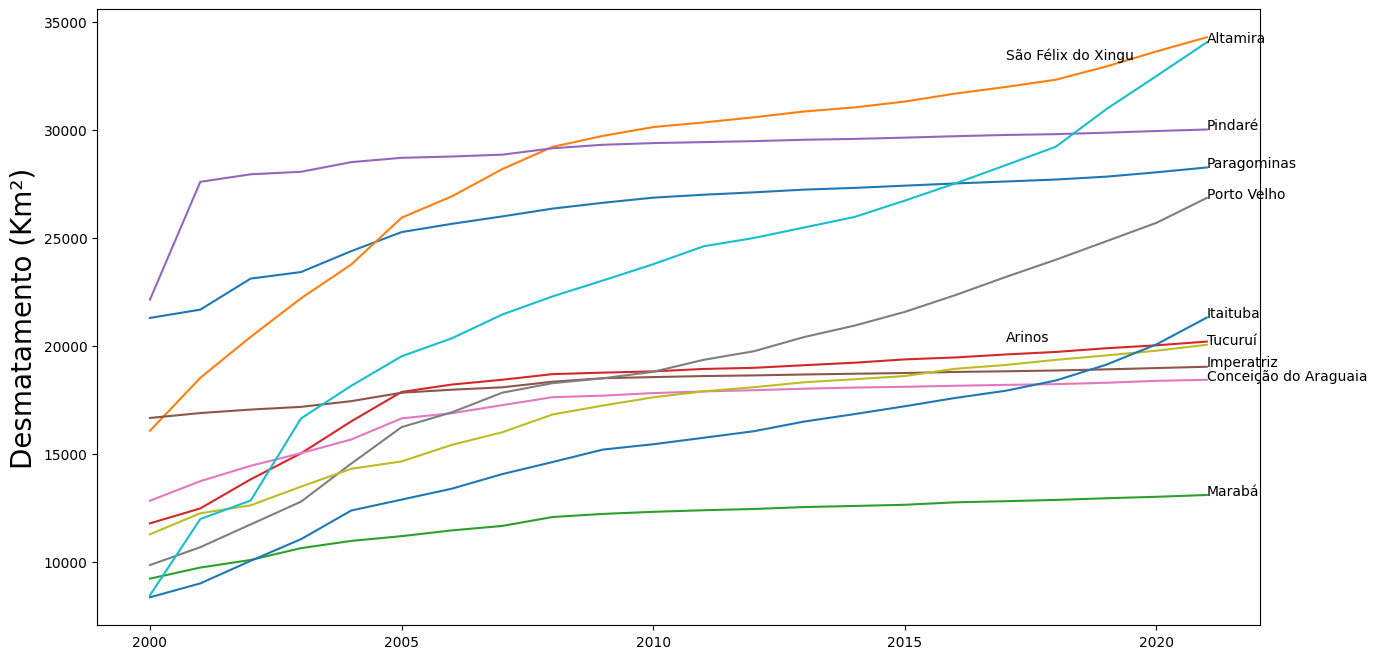

In [31]:
#Cidades que mais desmatam
plt.figure(figsize=(15, 8))
for i in range(len(muns)):

  if muns[i] == "São Félix do Xingu":
    plt.plot(list(set(novo.ano)),mat[i])
    plt.text(list(set(novo.ano))[-1]-4, mat[i][-1]-1000, str(muns[i]), fontsize = 10)
  elif muns[i] == "Arinos":
    plt.plot(list(set(novo.ano)),mat[i])
    plt.text(list(set(novo.ano))[-1]-4, mat[i][-1], str(muns[i]), fontsize = 10)
  else:
    plt.plot(list(set(novo.ano)),mat[i])
    plt.text(list(set(novo.ano))[-1], mat[i][-1], str(muns[i]), fontsize = 10)
plt.ylabel("Desmatamento (Km²)",fontsize = 20)
plt.show()

#Relação dos dados

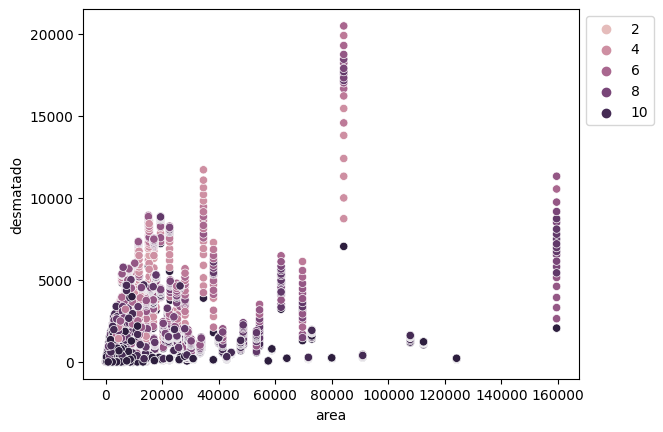

In [45]:
#Classe do desmatamento por área
sns.scatterplot(x='area', y='desmatado',
                hue='class', data=dados, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

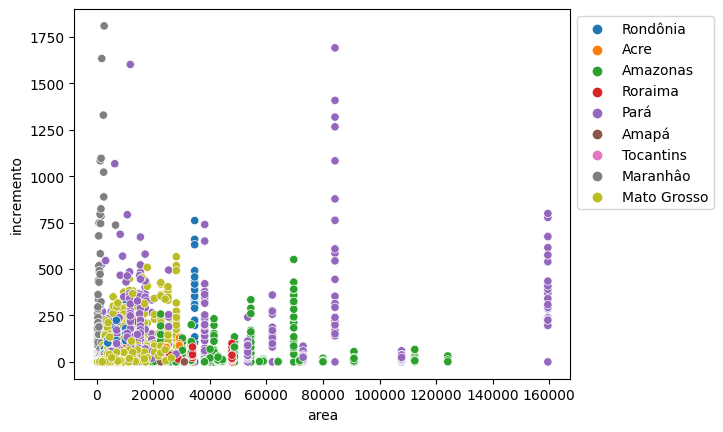

In [37]:
#Estado do incremento por área
sns.scatterplot(x='area', y='incremento',
                hue='estados', data=dados, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

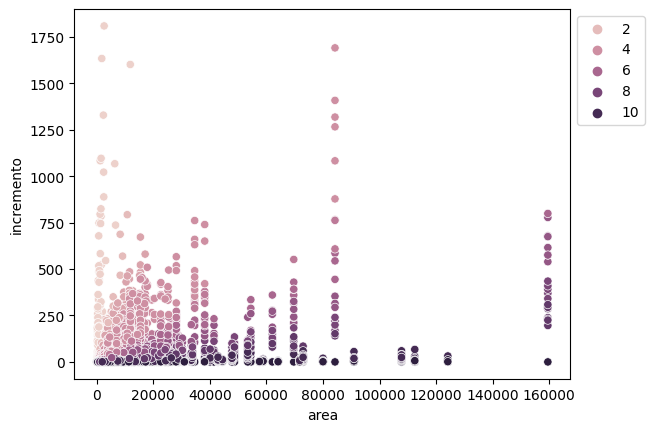

In [47]:
#Classe do incremento por área
sns.scatterplot(x='area', y='incremento',
                hue='class', data=dados, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

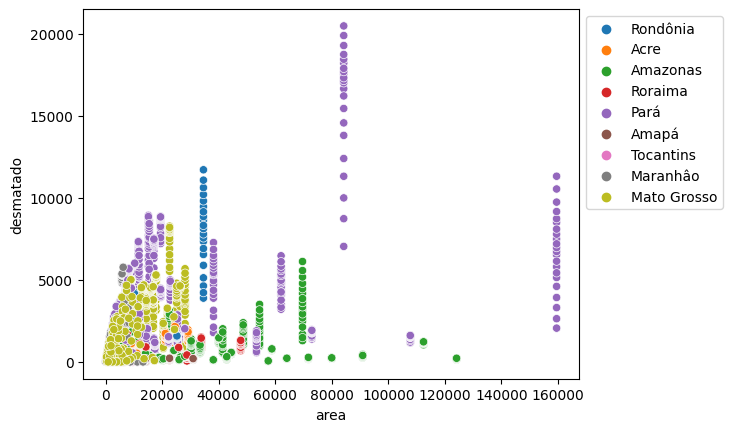

In [41]:
#Estado do incremento por área
sns.scatterplot(x='area', y='desmatado',
                hue='estados', data=dados, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

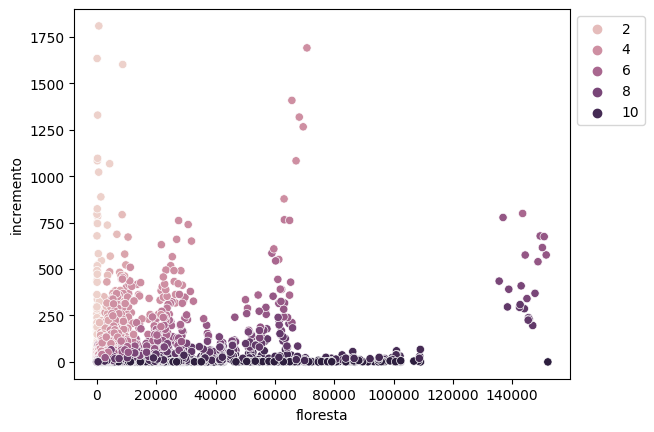

In [53]:
#Classe do incremento por Floresta
sns.scatterplot(x='floresta', y='incremento',
                hue='class', data=dados, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

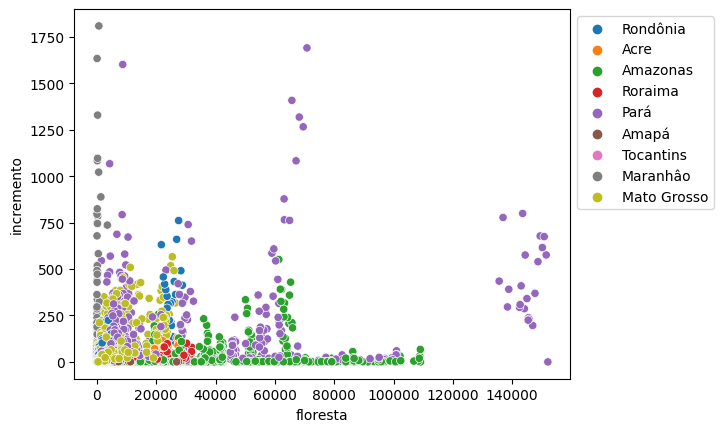

In [51]:
#Estado do incremento por Floresta
sns.scatterplot(x='floresta', y='incremento',
                hue='estados', data=dados, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

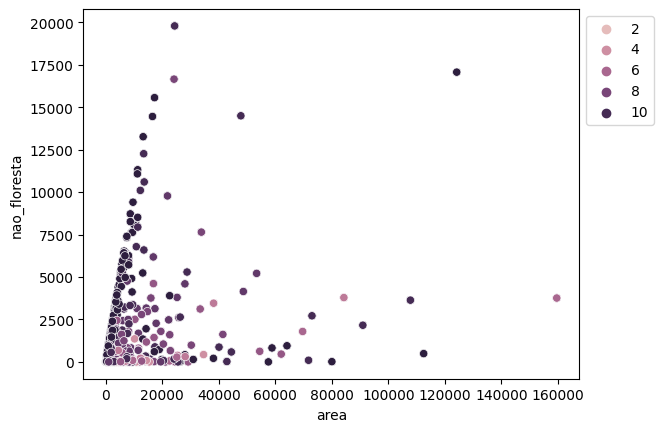

In [52]:
#Classe por nao_floresta x area
sns.scatterplot(x='area', y='nao_floresta',
                hue='class', data=dados, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

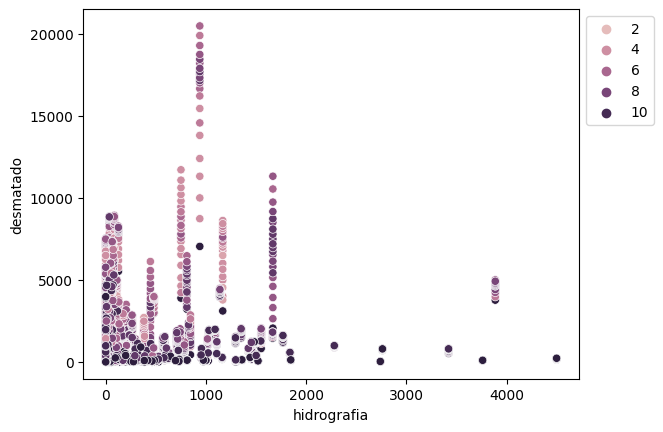

In [56]:
#
sns.scatterplot(x='hidrografia', y='desmatado',
                hue='class', data=dados, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

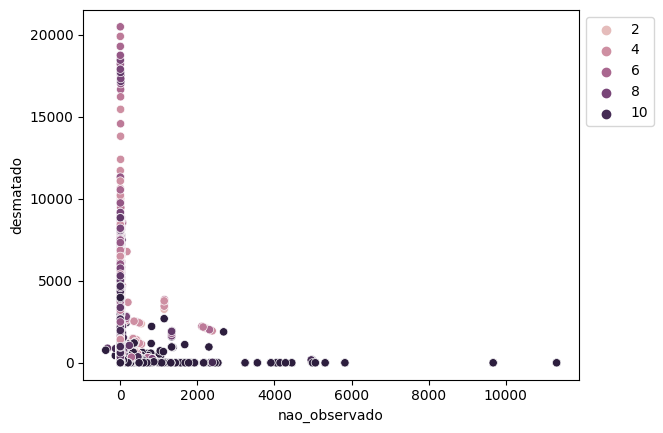

In [58]:
sns.scatterplot(x='nao_observado', y='desmatado',
                hue='class', data=dados, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

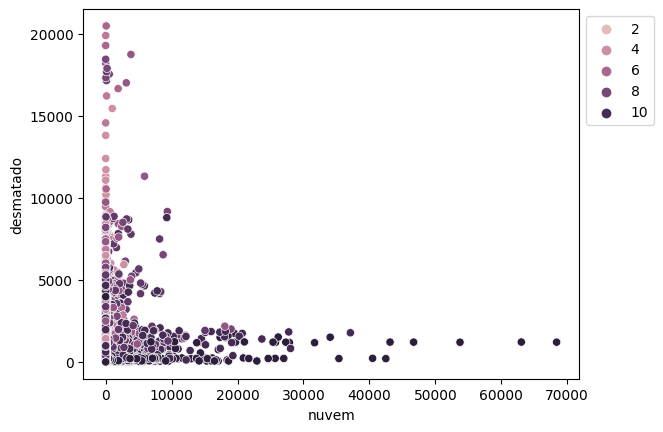

In [59]:
sns.scatterplot(x='nuvem', y='desmatado',
                hue='class', data=dados, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

#Normalização e Padronização dos dados

In [60]:
Novos_dados = dados[['ano','id_municipio', 'area', 'desmatado', 'incremento', 'floresta', 'nuvem', 'nao_floresta', 'nao_floresta',  'hidrografia']]

scaler = MinMaxScaler()
dados_normalizados_array  = scaler.fit_transform(Novos_dados)
dados_normalizados = pd.DataFrame(dados_normalizados_array, columns=Novos_dados.columns)

In [61]:
''''
scaler = StandardScaler()
dados_padronizados_array = scaler.fit_transform(dados_normalizados)
dados_padronizados = pd.DataFrame(dados_padronizados_array, columns=Novos_dados.columns)
''''

In [ ]:
'''
z_scores = stats.zscore(dados_padronizados)
dados_sem_outliers = dados_padronizados[(z_scores < 3).all(axis=1)]
'''

In [62]:
dados_normalizados['class'] = dados['class']

In [63]:
dados_normalizados.isnull().sum()

ano             0
id_municipio    0
area            0
desmatado       0
incremento      0
floresta        0
nuvem           0
nao_floresta    0
nao_floresta    0
hidrografia     0
class           0
dtype: int64

#Algoritmos de Inteligência artificial

In [64]:
X = dados_normalizados[['ano','id_municipio', 'area', 'desmatado', 'floresta', 'nuvem', 'nao_floresta', 'nao_floresta',  'hidrografia']]
y = dados_normalizados["class"]

In [65]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
#SVM
svm = SVC(kernel="rbf")
svm.fit(X_treino, y_treino)
y_pred_svm = svm.predict(X_teste)
acc_svm = accuracy_score(y_teste, y_pred_svm)
print("Acurácia do SVM: {:.2f}%".format(acc_svm*100))

Acurácia do SVM: 50.28%


In [67]:
#mlp
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation="relu", solver="adam")
mlp.fit(X_treino, y_treino)
y_pred_mlp = mlp.predict(X_teste)
acc_mlp = accuracy_score(y_teste, y_pred_mlp)
print("Acurácia do MLP: {:.2f}%".format(acc_mlp*100))

Acurácia do MLP: 48.78%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [75]:
X = dados[['ano','id_municipio', 'area', 'desmatado', 'floresta', 'nuvem', 'nao_floresta', 'nao_floresta',  'hidrografia']]
y = dados["class"]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
#KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_treino, y_treino)
y_pred_knn = knn.predict(X_teste)
acc_knn = accuracy_score(y_teste, y_pred_knn)
print("Acurácia do KNN: {:.2f}%".format(acc_knn*100))

Acurácia do KNN: 53.75%


In [70]:
print(accuracy_score_with_tolerance(y_teste, y_pred_svm))
print(accuracy_score_with_tolerance(y_teste, y_pred_mlp))
print(accuracy_score_with_tolerance(y_teste, y_pred_knn))

0.7234848484848485
0.7147129186602871
0.7884768740031898


#Keras

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

X = dados_normalizados[['ano','id_municipio', 'area', 'desmatado', 'floresta', 'nuvem', 'nao_floresta', 'nao_floresta',  'hidrografia']]
y = dados_normalizados["class"]

class_mapping = {label: idx for idx, label in enumerate(np.unique(y))}
y = y.map(class_mapping)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

num_classes = len(np.unique(y))
y_treino = to_categorical(y_treino, num_classes=num_classes)
y_teste = to_categorical(y_teste, num_classes=num_classes)

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_treino.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(X_treino, y_treino, epochs=20, batch_size=32, validation_split=0.2)
y_pred_keras = model.predict(X_teste)

loss, accuracy = model.evaluate(X_teste, y_teste)

print("Perda:", loss)
print("Acurácia:", accuracy)

Epoch 1/20
335/335 [==============================] - 2s 3ms/step - loss: 1.7934 - accuracy: 0.3828 - val_loss: 1.6311 - val_accuracy: 0.4058
Epoch 2/20
335/335 [==============================] - 1s 2ms/step - loss: 1.5627 - accuracy: 0.4442 - val_loss: 1.5108 - val_accuracy: 0.4608
Epoch 3/20
335/335 [==============================] - 1s 2ms/step - loss: 1.4829 - accuracy: 0.4752 - val_loss: 1.4710 - val_accuracy: 0.4839
Epoch 4/20
335/335 [==============================] - 1s 2ms/step - loss: 1.4492 - accuracy: 0.4876 - val_loss: 1.4423 - val_accuracy: 0.4944
Epoch 5/20
335/335 [==============================] - 1s 2ms/step - loss: 1.4270 - accuracy: 0.5000 - val_loss: 1.4284 - val_accuracy: 0.4948
Epoch 6/20
335/335 [==============================] - 1s 2ms/step - loss: 1.4065 - accuracy: 0.5031 - val_loss: 1.4099 - val_accuracy: 0.5022
Epoch 7/20
335/335 [==============================] - 1s 1ms/step - loss: 1.3935 - accuracy: 0.5095 - val_loss: 1.3998 - val_accuracy: 0.5064
Epoch 